In [12]:
import numpy as np
import os
import extract_lego_networks as eln
import networkx as nx
import sys
sys.path.insert(0, '/Users/glover.co/Documents/laszlo/NetDesign')
import network_design as nd

In [13]:
# Get ldr files
ldr_files = []
root_path = '/Users/glover.co/Documents/laszlo/NetDesign/data/lego/mepnet_data/'
classics = 'classics_lpub3d/'
architecture = 'architecture_lpub3d/'
synthetic = 'synthetic_test_lpub3d/'
dirs = [classics, architecture, synthetic]
names = []
for d in dirs:
    # Get model dirs
    model_dirs = os.listdir(root_path + d)
    for model in model_dirs:
        if model == '.DS_Store':
            continue
        # Get ldr files
        ldr_files.append(root_path + d + model + '/model.ldr')
        names.append(d[:-1] + '_' + model)

In [10]:
g, X = eln.create_lego_network(root_path+architecture+'000002/model.ldr',with_names=True)
X

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [6]:
len(X)

15

In [14]:
unique_names = list(set(names)) 
num_unique_names = len(unique_names)
X = np.zeros((g.number_of_nodes(), num_unique_names))
for i in range(g.number_of_nodes()):
    X[i, unique_names.index(names[i])] = 1
# return G, X

TypeError: unhashable type: 'numpy.ndarray'

In [15]:
eln.read_dat('/Users/glover.co/Downloads/ldraw/parts/4073.dat')

(array([], dtype=float64),
 array([], dtype=float64),
 ((0, 0, 0), (0, 0, 0)),
 (0, 0, 0))

In [7]:
root_path+architecture+'000002/model.ldr'

'/Users/glover.co/Documents/laszlo/NetDesign/data/lego/mepnet_data/architecture_lpub3d/000002/model.ldr'

In [8]:
names

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [11]:
graph_root = '/Users/glover.co/Documents/laszlo/NetDesign/data/lego/networks/'
for name, file in zip(names,ldr_files):
    g, X = eln.create_lego_network(file)
    nx.write_edgelist(g, graph_root + 'g_' + name + '.txt')
    np.savetxt(graph_root + 'X_' + name + '.txt', X)

In [21]:
g = nx.read_edgelist(graph_root + 'g_classics_lpub3d_000017.txt')

In [22]:
X = np.loadtxt(graph_root + 'X_classics_lpub3d_000017.txt')

In [23]:
g, X = eln.create_lego_network(ldr_files[17])
names

['3003',
 '3660',
 '3660',
 '3003',
 '3003',
 '3004',
 '3005',
 '3005',
 '3004',
 '3001',
 '3005',
 '3005',
 '3040b',
 '3040b',
 '3004',
 '3040b',
 '3040b',
 '2877',
 '3003',
 '85984',
 '3665',
 '3040b',
 '3665',
 '60481',
 '2877',
 '2877',
 '2877',
 '2877',
 '2877',
 '3005',
 '3005',
 '3004',
 '3040b']

In [24]:
names, positions, rotations = eln.read_ldr(ldr_files[17])

In [25]:
brick_pos=(positions*-1)[:,:2]


In [26]:
obj = nd.NetAssembly(X, nd.extract_O(g,X),X.sum(axis=0,dtype=int))

In [27]:
obj.g = g

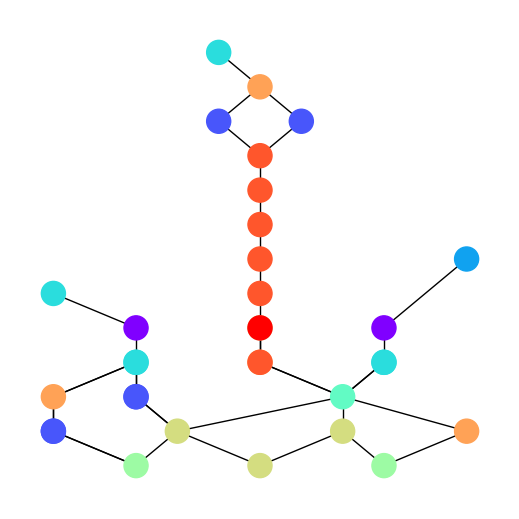

: 

In [28]:
obj.draw(with_networkx=True,pos=brick_pos)